In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [10]:
#loading WD layercounts
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
new_wdc_count['age'] = new_wdc_count['age'] * 1000
old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)
old_wdc_count['age'] = old_wdc_count['Cal age [ka BP] (ice age)']*1000

#loading EDML layercounts
edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

#loading GICC05 layercounts
gicc05_count = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/gicc05_time_scale_excel.xlsx', usecols=[0,2,3,4], names=['age', 'ngrip1 m', 'ngrip2 m', 'grip m'], skiprows=40)
gicc05_count['age'] = gicc05_count['age'] - 50
ngrip_combined = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/NGRIP/NGRIP1_2_combined_forPaleochrono_initial.xlsx', usecols=[0,1], names=['depth', 'age'], comment='#')
ngrip_combined['age'] = ngrip_combined['age'] - 50

#tiepoints
edml_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')
edml_ngrip_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/NGRIP_EDML_match.xlsx', comment='#', usecols=[1,2], names=['depth1','depth2'], skiprows=11)
grip_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')
ngrip_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')

#more edml_ngrip ties, need to combine these (which may cause issues if this code isn't updated)
edml_ngrip_ties2 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML-NGRIP/iceice_synchro_horizons.txt', sep='\t', comment='#')
edml_ngrip_ties = pd.concat([edml_ngrip_ties, edml_ngrip_ties2], ignore_index=True)
edml_ngrip_ties.sort_values(by='depth1', inplace=True)

#interpolations
edml_wdc_ties['old_edml age'] = np.interp(edml_wdc_ties['depth1'], edml_half['Depth (m)'], edml_half['yr b1950'])
edml_wdc_ties['old_wdc age'] = np.interp(edml_wdc_ties['depth2'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])

edml_ngrip_ties['old_edml age']= np.interp(edml_ngrip_ties['depth1'], edml_half['Depth (m)'], edml_half['yr b1950'])
edml_ngrip_ties['old_ngrip age'] = np.interp(edml_ngrip_ties['depth2'], ngrip_combined['depth'], ngrip_combined['age'])

grip_wdc_ties['old_grip age'] = np.interp(grip_wdc_ties['depth1'], gicc05_count['grip m'], gicc05_count['age'])
grip_wdc_ties['old_wdc age'] = np.interp(grip_wdc_ties['depth2'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])

ngrip_wdc_ties['old_ngrip age'] = np.interp(ngrip_wdc_ties['depth1'], ngrip_combined['depth'], ngrip_combined['age'])
ngrip_wdc_ties['old_wdc age'] = np.interp(ngrip_wdc_ties['depth2'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])


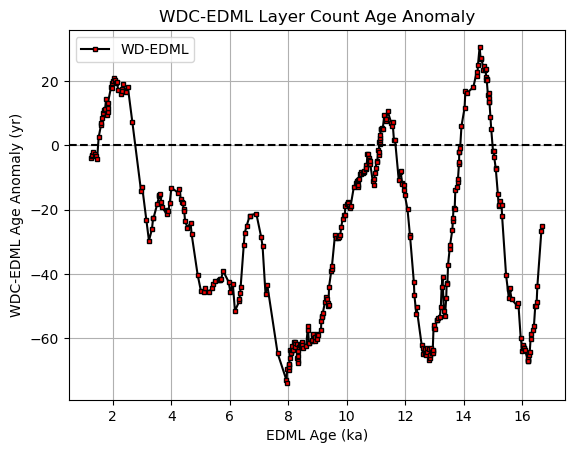

In [11]:
#LC comparison check 1
edml_wdc_ties = edml_wdc_ties[edml_wdc_ties['old_edml age'] < 16714] #restricting to top of EDML LC
plt.plot(edml_wdc_ties['old_edml age']/1000, (edml_wdc_ties['old_wdc age'] - edml_wdc_ties['old_edml age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='WD-EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('WDC-EDML Age Anomaly (yr)')
plt.xlabel('EDML Age (ka)')
plt.title('WDC-EDML Layer Count Age Anomaly')
plt.grid()
plt.legend()

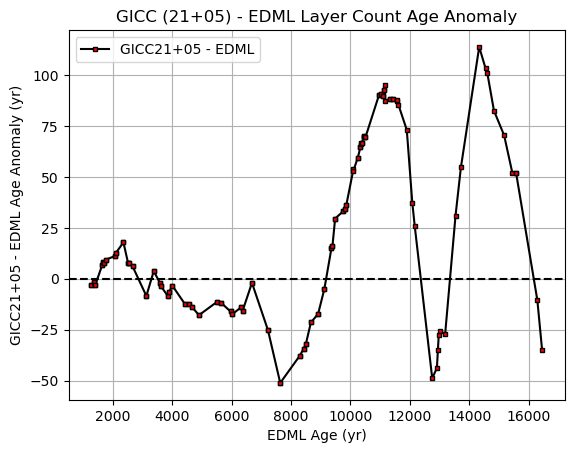

In [12]:
#LC comparison check 2
edml_ngrip_ties = edml_ngrip_ties[edml_ngrip_ties['old_edml age'] < 16714] #restricting to holocene
edml_ngrip_ties = edml_ngrip_ties[edml_ngrip_ties['depth1'] >= 82.33] #restricting to minimum LC availability
plt.plot(edml_ngrip_ties['old_edml age'], (edml_ngrip_ties['old_ngrip age'] - edml_ngrip_ties['old_edml age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='GICC21+05 - EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21+05 - EDML Age Anomaly (yr)')
plt.xlabel('EDML Age (yr)')
plt.title('GICC (21+05) - EDML Layer Count Age Anomaly')
plt.grid()
plt.legend()

In [13]:
ngrip_wdc_ties

,depth1,depth2,age_unc,old_ngrip age,old_wdc age
0,1399.381,1808.900,40,10153.262500,10079.333333
1,1419.080,1836.400,40,10433.534247,10355.752381
2,1458.680,1896.608,40,11054.808511,10955.827160
3,1470.640,1919.170,40,11254.981818,11172.567797
4,1479.711,1937.754,40,11421.977273,11341.991379
...,...,...,...,...,...
187,2475.109,3392.420,40,60152.000000,65387.666667
188,2478.760,3394.590,40,60152.000000,65478.000000
189,2481.763,3397.100,40,60152.000000,65478.000000
190,2485.190,3399.990,40,60152.000000,65478.000000


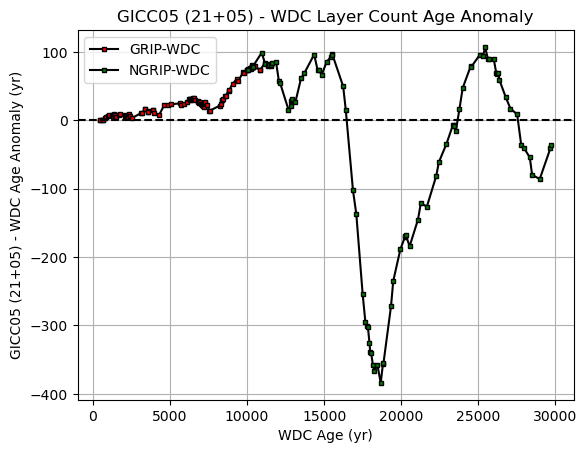

In [18]:
#LC comparison check 3
plt.plot(grip_wdc_ties['old_wdc age'], (grip_wdc_ties['old_grip age'] - grip_wdc_ties['old_wdc age']), marker='s', ms=3, mfc='r',linestyle='-', color='k', alpha=1, label='GRIP-WDC')

ngrip_wdc_ties = ngrip_wdc_ties[ngrip_wdc_ties['old_ngrip age'] <= 30000] #restricting to LGM
plt.plot(ngrip_wdc_ties['old_wdc age'], (ngrip_wdc_ties['old_ngrip age'] - ngrip_wdc_ties['old_wdc age']), marker='s', ms=3, mfc='g',linestyle='-', color='k', alpha=1, label='NGRIP-WDC')


plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC05 (21+05) - WDC Age Anomaly (yr)')
plt.xlabel('WDC Age (yr)')
plt.title('GICC05 (21+05) - WDC Layer Count Age Anomaly')
plt.grid()
plt.legend()

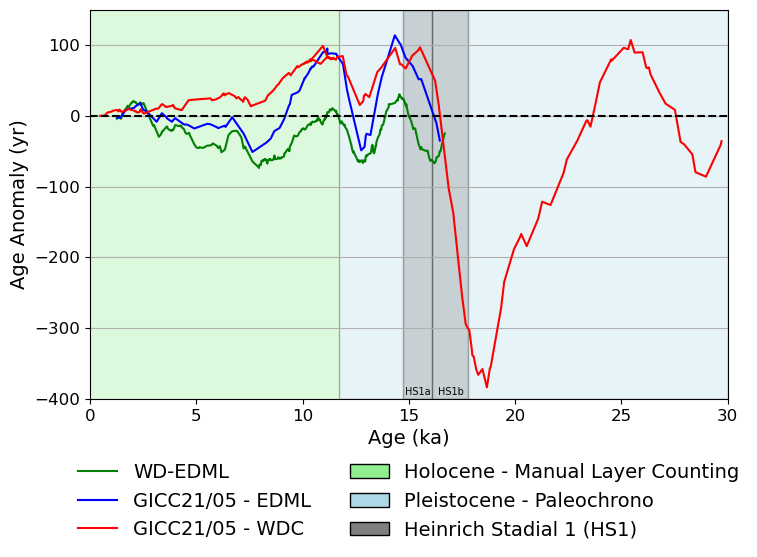

In [70]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(8, 6))

# --- your lines (example: use your dataframes here) ---
ax.plot(edml_wdc_ties['old_edml age']/1000,
        (edml_wdc_ties['old_wdc age'] - edml_wdc_ties['old_edml age']),
        linestyle='-', color='g', alpha=1, label='WD-EDML')

ax.plot(edml_ngrip_ties['old_edml age']/1000,
        (edml_ngrip_ties['old_ngrip age'] - edml_ngrip_ties['old_edml age']),
        linestyle='-', color='b', alpha=1, label='GICC21/05 - EDML')

ax.plot(grip_wdc_ties['old_wdc age']/1000,
        (grip_wdc_ties['old_grip age'] - grip_wdc_ties['old_wdc age']),
        linestyle='-', color='r', alpha=1, label='GICC21/05 - WDC')

ax.plot(ngrip_wdc_ties['old_wdc age']/1000,
        (ngrip_wdc_ties['old_ngrip age'] - ngrip_wdc_ties['old_wdc age']),
        linestyle='-', color='r', alpha=1)  # no label if redundant

# --- shading (no labels here) ---
ax.axvspan(0, 11.7, facecolor='lightgreen', alpha=0.3, edgecolor='none')
ax.axvspan(11.7, 30.0, facecolor='lightblue', alpha=0.3, edgecolor='none')
ax.axvspan(11.7, 30.0, facecolor='none', alpha=0.3, edgecolor='black')
ax.axvspan(16.1, 17.8, facecolor='gray', alpha=0.3, edgecolor='black')
ax.axvspan(14.7, 16.1, facecolor='gray', alpha=0.3, edgecolor='black')

# --- zero line and grid ---
ax.axhline(0, color='k', linestyle='--')
ax.grid(axis='y')

# --- create legend handles manually ---
line_wd_edml = Line2D([], [], color='g', linestyle='-')
line_edml = Line2D([], [], color='b', linestyle='-')
line_wdc = Line2D([], [], color='r', linestyle='-')

holocene_patch = Patch(facecolor='lightgreen', edgecolor='k', linewidth=1, label='Holocene - Manual Layer Counting')
pleistocene_patch = Patch(facecolor='lightblue', edgecolor='k', linewidth=1, label='Pleistocene - Paleochrono')
heinrich_patch = Patch(facecolor='gray', edgecolor='k', linewidth=1, label='Heinrich Stadial 1 (HS1)')


handles = [
    line_wd_edml, line_edml, line_wdc,
    holocene_patch, pleistocene_patch, heinrich_patch
]
labels = [
    'WD-EDML',
    'GICC21/05 - EDML',
    'GICC21/05 - WDC',
    'Holocene - Manual Layer Counting',
    'Pleistocene - Paleochrono',
    'Heinrich Stadial 1 (HS1)'
]

# --- single legend placed below the axes ---
ax.legend(handles=handles, labels=labels,
          loc='upper center', bbox_to_anchor=(0.5, -0.12),
          ncol=2, frameon=False)

#add text
ax.text(14.8, -395, "HS1a", fontsize=7, color='black')
ax.text(16.35, -395, "HS1b", fontsize=7, color='black')

#change font sizes
plt.rcParams.update({
    'font.size': 18,          # general font size
    'axes.titlesize': 16,     # title font size
    'axes.labelsize': 14,     # x and y label font size
    'xtick.labelsize': 12,    # x tick label font size
    'ytick.labelsize': 12,    # y tick label font size
    'legend.fontsize': 14     # legend font size
})

# adjust layout so the legend fits
plt.xlabel('Age (ka)')
plt.xlim(0, 30)
plt.ylim(-400,150)
plt.ylabel('Age Anomaly (yr)')
plt.tight_layout()

plt.savefig('/Users/quinnmackay/Desktop/temp.png', dpi=300, bbox_inches='tight')
